<a href="https://colab.research.google.com/github/CassioRocha/Dadoscd/blob/master/Projeto_FINAL_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  #                       PROJETO DE AM 2020.1  


> **Disciplina**: Aprendizagem de Máquina

> **Professores**: Evandro Costa e Xu Yang  

> **Dupla**: Cássio Rocha, Flávio Vasconcelos 


Colab url: https://colab.research.google.com/drive/1IEgNhVSTiZjof1T3KYB9vl3zsBBi4Mpl#scrollTo=oFIJHBWci0ym&uniqifier=1








# 1ª Etapa: Realizar uma Análise Exploratória
  banco de dados escolhido foi sobre **doença do rim crônico** , foi observado que existiam muitos dados faltantes. 
  * Os dados não estão balanceados

Usamos 24 + classe = 25 (11 numéricos, 14 nominais)
1. Idade (numérica) em anos
2. Pressão sanguínea (numérica) bp em mm / Hg
3. Gravidade específica (nominal) sg - (1.005,1.010,1.015 , 1.020,1.025)
4. Albumina (nominal) al - (0,1,2,3,4,5)
5. Açúcar (nominal) su - (0,1,2,3,4,5)
6. Vermelho Células sanguíneas (nominal) rbc - (normal, anormal)
7. Célula Pus (nominal) pc - (normal, anormal)
8. Grumos de células Pus (nominal) pcc - (presente, não presente)
9. Bactéria (nominal) ba - ( presente, não presente)
10. Glicose no sangue aleatória (numérica) bgr em mgs / dl
11. Ureia sanguínea (numérica) bu em mgs / dl
12. Creatinina sérica (numérica) sc em mgs / dl
13. Sódio (numérico) sod em mEq / L
14. Potássio (numérico) pot em mEq / L
15. Hemoglobina ( numérico) hemo em gms
16. Volume celular empacotado (numérico)
17.Contagem de glóbulos brancos (numérico) wc em células / cumm
18.Contagem de glóbulos vermelhos (numérico) rc em milhões / cmm
19.Hhipertensão (nominal) htn - ( sim, não)
20.Diabetes Mellitus (nominal ) DM - (sim, não)
21.Doença da Artéria Coronariana (nominal) cad - (sim, não)
22. Apetite Apetite (nominal) - (bom, ruim)
23.Pedal Edema (nominal) pe - (sim, não)
24.Anemia (nominal) ane - (sim, não)
25.Classe (nominal) classe - (ckd, notckd)


# 2. Investir em Pré-processamento
    O que foi realizado ?
   * remoção de espaço de coluna a mais com espaço em branco  
   * remoção de dados faltantes(total de dados 400,  depois da remoção ficaram 158, melhorou acuracia ) 
   * troca de valores Nominável por númerico
   * Não houve dados duplicados 



obs: Tarefas realizadas abaixo.


In [59]:
import pandas as pd

kidney =  pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/chronic_kidney_disease.csv")

kidneytotal = pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/chronic_kidney_disease.csv")
kidneytotal.classe.replace(['ckd','ckd\t','notckd'],[1,1,0], inplace=True)

#pd.options.display.max_rows = 10000




#-----------------------Remoção de Dados faltantes-----------------------------
kidney.drop(kidney[kidney.age == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bp == '?'].index, inplace=True)
kidney.drop(kidney[kidney.al == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sg == '?'].index, inplace=True)
kidney.drop(kidney[kidney.su == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bu == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sod == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pot == '?'].index, inplace=True)
kidney.drop(kidney[kidney.hemo == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pcv == '?'].index, inplace=True)
kidney.drop(kidney[kidney.wbcc== '?'].index, inplace=True)
kidney.drop(kidney[kidney.rbcc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.rbc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pcc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.ba == '?'].index, inplace=True)
kidney.drop(kidney[kidney.htn == '?'].index, inplace=True)
kidney.drop(kidney[kidney.dm == '?'].index, inplace=True)
kidney.drop(kidney[kidney.cad == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pe == '?'].index, inplace=True)
kidney.drop(kidney[kidney.ane == '?'].index, inplace=True)
kidney.drop(kidney[kidney.appet == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bgr == '?'].index, inplace=True)

#--------------------------------------------------------------------------------

#kidney.replace(['?'],[''], inplace=True)

#----------------Preparando os dados----------------------------
kidney.rbc.replace(['normal', 'abnormal'],[1,0], inplace=True)
kidney.pc.replace(['normal', 'abnormal'],[1,0], inplace=True)
kidney.pcc.replace(['notpresent','present'],[0,1], inplace=True)
kidney.ba.replace(['notpresent','present'],[0,1], inplace=True)
kidney.htn.replace(['yes', 'no'],[1,0], inplace=True)
kidney.dm.replace(['yes', 'no'],[1,0], inplace=True)
kidney.cad.replace(['yes', 'no'],[1,0], inplace=True)
kidney.pe.replace(['yes', 'no'],[1,0], inplace=True)
kidney.ane.replace(['yes', 'no'],[1,0], inplace=True)
kidney.appet.replace(['good', 'poor'],[1,0], inplace=True)
kidney.classe.replace(['ckd','ckd\t', 'notckd'],[1,1,0], inplace=True)
#------------------------------------------------------------------------------

#-------------------Remoção de dados duplicados--------------------------------
#print(kidney.duplicated().values)
#kidney.drop_duplicates() 




[0 1]
[150 250]


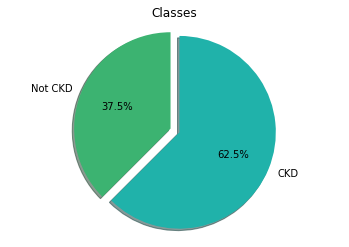

[0 1]
[115  43]


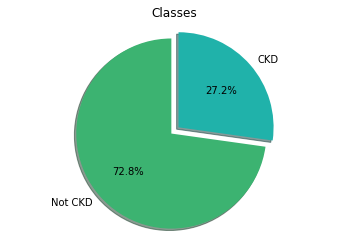

In [30]:
import numpy as np
class_y, count_y = np.unique(kidneytotal.classe.array, return_counts=True)
print(class_y)
print(count_y)

import matplotlib.pyplot as plt
def create_pizza(labels, sizes, title, colors = ['#3CB371', '#20B2AA']) :
    fig1, ax1 = plt.subplots()
    labels = {'Not CKD':0,'CKD':1}
    explode = (0.1, 0)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title(title)
    plt.show()
title = 'Classes'
labels = class_y[0], class_y[1]
create_pizza(class_y, count_y, title)



class_y, count_y = np.unique(kidney.classe.array, return_counts=True)
print(class_y)
print(count_y)

import matplotlib.pyplot as plt
def create_pizza(labels, sizes, title, colors = ['#3CB371', '#20B2AA']) :
    fig1, ax1 = plt.subplots()
    labels = {'Not CKD':0,'CKD':1}
    explode = (0.1, 0)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title(title)
    plt.show()
title = 'Classes'
labels = class_y[0], class_y[1]
create_pizza(class_y, count_y, title)


 **Pre-processamento: Função de treinamento e teste**

In [ ]:
import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
target = kidney.pop('classe')

cv = 10

scoring = ['accuracy', 'f1_weighted']

def train_test(model, kidney=kidney, target= target, cv= cv):
 train_log = ""
 t0 = time()

 scores = cross_validate(model, kidney, target, cv= cv, scoring=scoring, return_train_score=False)
 test_accuracy = np.mean(scores['test_accuracy'])
 train_log += "\nAverage accuracy: " + str(round(test_accuracy, 3))
 
 test_f1_weighted = np.mean(scores['test_f1_weighted'])
 train_log += "\nF1-score test medium: " + str(round(test_f1_weighted, 3))
 
 return train_log






In [ ]:
print("---------------RandomForest----------------------------")
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
log = train_test(rdnf)
print(log)
print("-------------------------------------------------------\n")

print("---------------KNN-------------------------------------")
n = kidney.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log = train_test(neigh)
print(log)
print("-------------------------------------------------------\n")


print("---------------NAIVE BAYES--------------------------------")
gnb = GaussianNB()
log = train_test(gnb)
print(log)
print("-------------------------------------------------------\n")

print("---------------Perceptron (Rede Neural)----------------------")
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)
log = train_test(mlp)
print(log)
print("-------------------------------------------------------\n")

print("---------------SVM----------------------------------------")
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'rbf')
log = train_test(svm)
print(log)
print("-------------------------------------------------------\n")


---------------RandomForest----------------------------

Average accuracy: 0.994
F1-score test medium: 0.994
-------------------------------------------------------

---------------KNN-------------------------------------

Average accuracy: 0.816
F1-score test medium: 0.769
-------------------------------------------------------

---------------NAIVE BAYES--------------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------Perceptron (Rede Neural)----------------------

Average accuracy: 0.728
F1-score test medium: 0.614
-------------------------------------------------------

---------------SVM----------------------------------------

Average accuracy: 0.76
F1-score test medium: 0.676
-------------------------------------------------------



# ***Redução de dimensionalidade( PCA, FAMD) ***
*** PCA (Principal Component Analisys)***  






[ 46.2  54.1  60.2  65.1  69.5  73.5  77.1  80.1  83.   85.5  87.6  89.4
  90.9  92.4  93.7  94.9  95.9  96.8  97.5  98.2  98.8  99.3  99.7 100. ]
(158, 24)


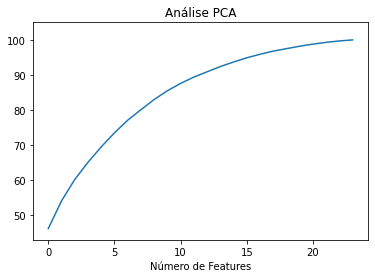

In [ ]:
#PCA

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

kidneypre =  pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/kindeyprep.csv")

y = kidneypre.classe
X = kidneypre.drop('classe', axis=1)


ss = StandardScaler()
X_std = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X_std.head()


n_features = X_std.shape[1]

covar_matrix = PCA(n_components = n_features)

covar_matrix.fit(X_std)
variance = covar_matrix.explained_variance_ratio_ # Taxa de variância calculada
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
#var # Soma cumulativa de variância explicada com o número de features

print(var)
plt.xlabel('Número de Features')
plt.title('Análise PCA')
plt.ylim(43,105)
plt.style.context('seaborn-whitegrid')
plt.plot(var)


kidney_pca = covar_matrix.fit_transform(X_std)
kidney_pca = pd.DataFrame(data=kidney_pca)
print(kidney_pca.shape)


kidney_pca['classe'] = y






**Acurácia** depois do PCA



In [ ]:

import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
target =  kidney_pca.pop('classe')

#target = kidney_pca.drop('classe', axis=1)

cv = 10

scoring = ['accuracy', 'f1_weighted']

def train_test(model, kidney_pca=kidney_pca, target= target, cv= cv):
 train_log = ""
 t0 = time()

 scores = cross_validate(model, kidney_pca, target, cv= cv, scoring=scoring, return_train_score=False)
 test_accuracy = np.mean(scores['test_accuracy'])
 train_log += "\nAverage accuracy: " + str(round(test_accuracy, 3))
 
 test_f1_weighted = np.mean(scores['test_f1_weighted'])
 train_log += "\nF1-score test medium: " + str(round(test_f1_weighted, 3))
 
 return train_log


In [ ]:
print("---------------RandomForest----------------------------")
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
log = train_test(rdnf)
print(log)
print("-------------------------------------------------------\n")

print("---------------KNN-------------------------------------")
n = kidney_pca.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log1 = train_test(neigh)
print(log1)
print("-------------------------------------------------------\n")


print("---------------NAIVE BAYES--------------------------------")
gnb = GaussianNB()
log = train_test(gnb)
print(log)
print("-------------------------------------------------------\n")

print("---------------Perceptron (Rede Neural)----------------------")
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)
log = train_test(mlp)
print(log)
print("-------------------------------------------------------\n")

print("---------------SVM----------------------------------------")
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'linear')
log = train_test(svm)
print(log)
print("-------------------------------------------------------\n")


---------------RandomForest----------------------------

Average accuracy: 0.994
F1-score test medium: 0.994
-------------------------------------------------------

---------------KNN-------------------------------------

Average accuracy: 0.816
F1-score test medium: 0.769
-------------------------------------------------------

---------------NAIVE BAYES--------------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------Perceptron (Rede Neural)----------------------

Average accuracy: 0.728
F1-score test medium: 0.614
-------------------------------------------------------

---------------SVM----------------------------------------

Average accuracy: 0.765
F1-score test medium: 0.772
-------------------------------------------------------



# **3ª Etapa: Redução de dimensionalidade**
**FAMD (Factor Analysis of Mixed Data)**
[texto do link](https://)

[ 4.   5.8  7.5  9.1 10.7 12.2 13.7 15.1 16.5 17.8 19.1 20.4 21.7 23.
 24.2 25.4 26.6 27.8 28.9 30.  31.1 32.1 33.1 34.1]
(158, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,classe
3,2.477706,1.590145,1.170371,0.220730,0.564107,1.856299,-0.781736,2.173291,-0.448675,-1.624607,-2.308005,-2.298877,-0.239373,0.448915,4.194590,-0.950365,-0.517787,-0.664643,-1.914321,-1.167704,-0.807796,1.401756,-0.100468,-0.823424,1
9,2.889552,1.358663,-0.688401,-0.829351,-0.838788,-0.023847,-0.964440,-1.121919,1.716170,-1.938710,2.300885,-0.798210,0.869365,-0.738152,0.714551,0.293859,1.125462,-0.065817,-0.980211,1.759782,-0.492726,0.121591,-1.355433,2.399308,1
11,3.065615,0.204014,-1.392642,-0.470708,1.600726,0.387072,-1.624202,-0.761903,2.820948,0.936843,-2.508051,-0.820629,0.906845,0.425026,1.001349,-0.036665,-0.964857,-1.178213,-2.027087,-0.517353,-0.635443,0.192037,-0.094060,-2.866206,1
14,3.921893,-3.232523,0.470830,5.990793,2.266921,-2.181064,-3.422851,1.612982,-1.307873,-0.365418,1.326884,1.555937,1.786084,2.169129,-1.197125,-0.436868,-0.349930,-0.005861,-0.568467,-0.208431,-1.602198,-0.584125,-1.002413,0.945594,1
20,3.199368,-0.473906,-0.296002,-1.651854,-0.676668,-0.876536,-0.132849,-0.509985,-2.217725,0.015622,0.865751,1.045066,2.897020,-2.164492,1.329878,-0.660789,0.448897,-1.846428,0.619414,-2.390131,2.665091,-2.924414,-1.337631,-1.672690,1


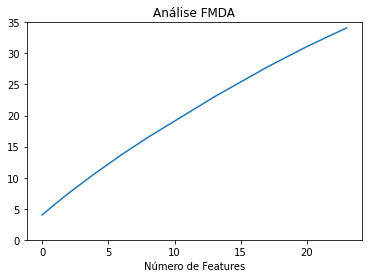

In [31]:
!pip install prince

from prince import FAMD
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
#kidneypre =  pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/kindeyprep.csv")

X  = kidney.drop('classe', axis=1)
y =  kidney.classe


n_features = X.shape[1] # Temos 24 features

famd = FAMD(n_components = n_features, n_iter = 3, random_state = 1)
famd.fit(X)

kidney_famd = famd.transform(X)

var_famd=np.cumsum(np.round(famd.explained_inertia_, decimals=3)*100)
print(var_famd)

plt.xlabel('Número de Features')
plt.title('Análise FMDA')
plt.ylim(0,35)
plt.style.context('seaborn-whitegrid')
plt.plot(var_famd)

famd = FAMD(n_components = 24, n_iter = 10, random_state = 101)
famd.fit(X)
kidney_famd = famd.transform(X)
kidney_famd = pd.DataFrame(data=kidney_famd)
print(kidney_famd.shape)
kidney_famd['classe'] = y
kidney_famd.head()


In [ ]:
import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
target =  kidney_famd.pop('classe')

#target = kidney_pca.drop('classe', axis=1)

cv = 10

scoring = ['accuracy', 'f1_weighted']

def train_test(model,kidney_famd=kidney_famd, target= target, cv= cv):
 train_log = ""
 t0 = time()

 scores = cross_validate(model, kidney_famd, target, cv= cv, scoring=scoring, return_train_score=False)
 test_accuracy = np.mean(scores['test_accuracy'])
 train_log += "\nAverage accuracy: " + str(round(test_accuracy, 3))
 
 test_f1_weighted = np.mean(scores['test_f1_weighted'])
 train_log += "\nF1-score test medium: " + str(round(test_f1_weighted, 3))
 
 return train_log


In [ ]:
print("---------------RandomForest----------------------------")
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
log = train_test(rdnf)
print(log)
print("-------------------------------------------------------\n")

print("---------------KNN-------------------------------------")
n = kidney_famd.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log1 = train_test(neigh)
print(log1)
print("-------------------------------------------------------\n")


print("---------------NAIVE BAYES--------------------------------")
gnb = GaussianNB()
log = train_test(gnb)
print(log)
print("-------------------------------------------------------\n")

print("---------------Perceptron (Rede Neural)----------------------")
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)
log = train_test(mlp)
print(log)
print("-------------------------------------------------------\n")

print("---------------SVM----------------------------------------")
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'linear')
log = train_test(svm)
print(log)
print("-------------------------------------------------------\n")


---------------RandomForest----------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------KNN-------------------------------------

Average accuracy: 0.728
F1-score test medium: 0.614
-------------------------------------------------------

---------------NAIVE BAYES--------------------------------

Average accuracy: 0.994
F1-score test medium: 0.994
-------------------------------------------------------

---------------Perceptron (Rede Neural)----------------------

Average accuracy: 0.988
F1-score test medium: 0.987
-------------------------------------------------------

---------------SVM----------------------------------------

Average accuracy: 0.975
F1-score test medium: 0.973
-------------------------------------------------------



# **4ª Etapa: Aplicação de Balanceamento**
kidney_upsampled

**Pré-processamento e Balanceamento (Acurácia)**

In [33]:
def get_maj_min(kidney):
 kidney_majority = kidney[kidney.classe==0]
 kidney_minority = kidney[kidney.classe==1]
 return kidney_majority, kidney_minority

from sklearn.utils import resample
def upsample(kidney):
    kidney_majority, kidney_minority = get_maj_min(kidney)
    n_no = kidney_majority.shape[0]

    minority_up = resample(kidney_minority, replace=True, n_samples=n_no, random_state=10)
    kidney_upsampled = pd.concat([kidney_majority, minority_up])
    return kidney_upsampled


kidney_upsampled = upsample(kidney)
u = kidney_upsampled.classe.value_counts()
print(u)
print(f'O dataframe foi balanceado utilizando Up-sample'+ f' e agora conta com {u.sum()} exemplos.')


1    115
0    115
Name: classe, dtype: int64
O dataframe foi balanceado utilizando Up-sample e agora conta com 230 exemplos.


[0 1]
[115 115]


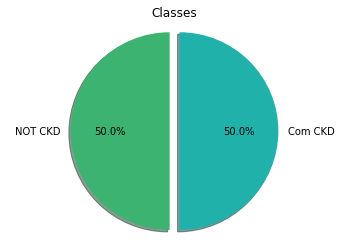

In [34]:
import numpy as np
class_y, count_y = np.unique(kidney_upsampled.classe.array, return_counts=True)
print(class_y)
print(count_y)

import matplotlib.pyplot as plt
def create_pizza(labels, sizes, title, colors = ['#3CB371', '#20B2AA']) :
    fig1, ax1 = plt.subplots()
    labels = {'NOT CKD':0,'Com CKD':1}
    explode = (0.1, 0)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title(title)
    plt.show()
title = 'Classes'
labels = class_y[0], class_y[1]
create_pizza(class_y, count_y, title)

In [ ]:
import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
target =  kidney_upsampled.pop('classe')

#target = kidney_pca.drop('classe', axis=1)

cv = 10

scoring = ['accuracy', 'f1_weighted']

def train_test(model,kidney_upsampled=kidney_upsampled, target= target, cv= cv):
 train_log = ""
 t0 = time()

 scores = cross_validate(model, kidney_upsampled, target, cv= cv, scoring=scoring, return_train_score=False)
 test_accuracy = np.mean(scores['test_accuracy'])
 train_log += "\nAverage accuracy: " + str(round(test_accuracy, 3))
 
 test_f1_weighted = np.mean(scores['test_f1_weighted'])
 train_log += "\nF1-score test medium: " + str(round(test_f1_weighted, 3))
 
 return train_log


In [ ]:
print("---------------RandomForest----------------------------")
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
log = train_test(rdnf)
print(log)
print("-------------------------------------------------------\n")

print("---------------KNN-------------------------------------")
n = kidney_famd.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log1 = train_test(neigh)
print(log1)
print("-------------------------------------------------------\n")


print("---------------NAIVE BAYES--------------------------------")
gnb = GaussianNB()
log = train_test(gnb)
print(log)
print("-------------------------------------------------------\n")

print("---------------Perceptron (Rede Neural)----------------------")
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)
log = train_test(mlp)
print(log)
print("-------------------------------------------------------\n")

print("---------------SVM----------------------------------------")
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'linear')
log = train_test(svm)
print(log)
print("-------------------------------------------------------\n")


---------------RandomForest----------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------KNN-------------------------------------

Average accuracy: 0.704
F1-score test medium: 0.694
-------------------------------------------------------

---------------NAIVE BAYES--------------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------Perceptron (Rede Neural)----------------------

Average accuracy: 0.478
F1-score test medium: 0.309
-------------------------------------------------------

---------------SVM----------------------------------------

Average accuracy: 0.804
F1-score test medium: 0.8
-------------------------------------------------------



*** Balanceamento  + Redução***

In [49]:
def get_maj_min(kidney_famd):
 kidney_majority = kidney_famd[kidney_famd.classe==0]
 kidney_minority = kidney_famd[kidney_famd.classe==1]
 return kidney_majority, kidney_minority

from sklearn.utils import resample
def upsample(kidney_famd):
    kidney_majority, kidney_minority = get_maj_min(kidney_famd)
    n_no = kidney_majority.shape[0]

    minority_up = resample(kidney_minority, replace=True, n_samples=n_no, random_state=10)
    kidney_upsampled = pd.concat([kidney_majority, minority_up])
    return kidney_upsampled


kidney_upsampled = upsample(kidney_famd)
u = kidney_upsampled.classe.value_counts()
print(u)
print(f'O dataframe foi balanceado utilizando Up-sample'+ f' e agora conta com {u.sum()} exemplos.')
pd.options.display.max_rows = 10000

kidney_upsampled.head()


1    115
0    115
Name: classe, dtype: int64
O dataframe foi balanceado utilizando Up-sample e agora conta com 230 exemplos.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,classe
250,-0.774160,0.040224,-0.217312,-0.018382,0.185202,0.147053,0.072681,0.166877,-0.168572,0.488228,0.349356,0.162803,-0.183576,0.080540,0.035891,-0.079301,-0.321580,0.156502,-0.275051,-0.307882,0.387154,-0.071554,0.134691,0.035749,0
251,-0.639921,-0.021615,0.076168,-0.004785,0.000148,-0.144745,-0.109666,0.079093,-0.010865,-0.281896,0.268609,-0.232591,-0.053243,-0.045698,-0.079446,-0.137340,0.102325,0.102683,0.250143,0.418752,0.536028,0.370296,-0.024343,0.147012,0
252,-0.816132,-0.017771,0.060611,0.226103,-0.015301,0.007722,0.054812,-0.112566,0.093030,-0.065339,0.003223,0.179053,-0.060712,0.064785,0.378562,0.255132,0.143503,0.122379,-0.282663,-0.138323,0.222455,0.068217,-0.388551,0.422521,0
253,-0.797878,0.063744,-0.053665,0.124370,-0.096981,0.248092,-0.013999,0.294057,-0.159665,-0.032103,-0.176914,0.316284,0.113305,0.054426,-0.225325,-0.072704,0.017042,0.046024,0.038546,-0.024368,0.251672,-0.041636,-0.230878,0.004906,0
254,-0.788007,0.030360,0.044429,0.088114,-0.011180,-0.026619,-0.030148,-0.047294,-0.082663,-0.122833,0.120724,-0.046550,0.025270,-0.168746,-0.186272,0.054846,0.032440,0.053096,-0.177562,-0.183362,0.391152,0.073032,-0.106985,0.209647,0


*** Acurácia: Redução de dimensionalidade (FAMD)  + Balanceamento (Up-sample Minority)***

In [36]:
import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings

warnings.filterwarnings("ignore")
target =  kidney_upsampled.pop('classe')

#target = kidney_pca.drop('classe', axis=1)

cv = 10

scoring = ['accuracy', 'f1_weighted']

def train_test(model,kidney_upsampled=kidney_upsampled, target= target, cv= cv):
 train_log = ""
 t0 = time()

 scores = cross_validate(model, kidney_upsampled, target, cv= cv, scoring=scoring, return_train_score=False)
 test_accuracy = np.mean(scores['test_accuracy'])
 train_log += "\nAverage accuracy: " + str(round(test_accuracy, 3))
 
 test_f1_weighted = np.mean(scores['test_f1_weighted'])
 train_log += "\nF1-score test medium: " + str(round(test_f1_weighted, 3))
 
 return train_log


In [37]:
print("---------------RandomForest----------------------------")
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
log = train_test(rdnf)
print(log)
print("-------------------------------------------------------\n")

print("---------------KNN-------------------------------------")
n = kidney_famd.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log1 = train_test(neigh)
print(log1)
print("-------------------------------------------------------\n")


print("---------------NAIVE BAYES--------------------------------")
gnb = GaussianNB()
log = train_test(gnb)
print(log)
print("-------------------------------------------------------\n")

print("---------------Perceptron (Rede Neural)----------------------")
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)
log = train_test(mlp)
print(log)
print("-------------------------------------------------------\n")

print("---------------SVM----------------------------------------")
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'linear')
log = train_test(svm)
print(log)
print("-------------------------------------------------------\n")


---------------RandomForest----------------------------

Average accuracy: 1.0
F1-score test medium: 1.0
-------------------------------------------------------

---------------KNN-------------------------------------

Average accuracy: 0.822
F1-score test medium: 0.809
-------------------------------------------------------

---------------NAIVE BAYES--------------------------------

Average accuracy: 0.996
F1-score test medium: 0.996
-------------------------------------------------------

---------------Perceptron (Rede Neural)----------------------

Average accuracy: 0.996
F1-score test medium: 0.996
-------------------------------------------------------

---------------SVM----------------------------------------

Average accuracy: 0.996
F1-score test medium: 0.996
-------------------------------------------------------



# **5ª Etapa: Ensemble boosting**

In [56]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import statistics
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


                #kidney_upsampled  
X  = kidney_upsampled
y =  kidney_upsampled.classe


#-------------------------------------------------------------------------------------------------------
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5, random_state=42)
ppn = Perceptron(max_iter=2000, eta0=0.1, random_state=0)
cknn = KNeighborsClassifier(n_neighbors=3) #3 visinhos
csvm = svm.SVC(kernel='linear')
cnb = GaussianNB()


# variável  desempenho do f-meansure
result = []

# ----------------------bagging ----------------------------------------------------------------
bagging = [cknn, csvm, cnb,ppn,rdnf]
for i in range(len(bagging)):
    view = X.sample(int(len(X)/3), replace=True)
    data_view = view.iloc[:, :-1].values
    target_view = view['classe']
    X_train, X_test, y_train, y_test = train_test_split(data_view, target_view, test_size=0.3, random_state=90)
    bagging[i].fit(X_train, y_train)
    result.append(bagging[i].score(X_test, y_test))
#-----------------------------------------------------------------------------------------------    

#----------------------single ------------------------------------------------------------------
data = X.iloc[:, :-1].values
target = X['classe']
X_train, X_test, y_train, y_test = train_test_split(data, target,  test_size=0.3, random_state=580)

result = []


for i in range(len(bagging)):
    bagging[i].fit(X_train, y_train)
    result.append(bagging[i].score(X_test, y_test))
    
#------------------------------------------------------------------------------------------------

print("   Média dos resultados =>  ",statistics.mean(result))
print("\n    KNN,    SVM,  NAIVEBayes, Rede neural \n", result)

   Média dos resultados =>   0.9971014492753624

    KNN,    SVM,  NAIVEBayes, Rede neural 
 [0.9855072463768116, 1.0, 1.0, 1.0, 1.0]
